# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

In [ ]:
def f(t, theta):
    #Write your code here.
    res = -2.2067e-12 * (theta**4 - 81e8)
    return res

def RungeKutta2(x_0, y_0, h, x):
    num_steps = int((x - x_0) / h)

    t = x_0
    res = y_0

    for _ in range(num_steps):
        k1 = f(t, res)
        k2 = f(t + h, res + k1 * h)
        res += 0.5 * (k1 + k2) * h
        t += h

    return res

In [ ]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480)}K')

Temperature at t = 480s with step size h = 240s is 584.2684867703111K


Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [ ]:
# Write your code here.

from scipy.optimize import fsolve
import numpy as np

def equation(theta, t):
    return 0.92593 * np.log((theta - 300) / (theta + 300)) - 1.8519 * np.arctan(0.3333e-2 * theta) + 0.22067e-3 * t + 2.9282


initial_guess = 1200
target = 480
solution = fsolve(equation, initial_guess, args=(target,))[0]

print("Exact solution at t =", target, "seconds:", solution)

Exact solution at t = 480 seconds: 647.5607989325939


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [ ]:
# Write your code here.

def exact_solution(t):
    result = fsolve(equation, initial_guess, args=(t,))[0]
    return result

def global_truncation_error(approximate, exact):
    return exact - approximate

def absolute_relative_true_error(approximate, exact):
    return abs((exact - approximate) / exact) * 100

t_ini = 0
theta_ini = 1200

step_sizes = [480, 240, 120, 60, 30]

for h in step_sizes:
    approximate_solution = RungeKutta2(t_ini, theta_ini, h, target)
    exact_solution_val = exact_solution(target)

    gt_error = global_truncation_error(approximate_solution, exact_solution_val)
    rel_error = absolute_relative_true_error(approximate_solution, exact_solution_val)

    print(f"Step Size: {h} seconds")
    print(f"Approximate Solution at t = {target} seconds: {approximate_solution}")
    print(f"Global Truncation Error: {gt_error}")
    print(f"Absolute Relative True Error: {rel_error}\n")

Step Size: 480 seconds
Approximate Solution at t = 480 seconds: -393.86949676856057
Global Truncation Error: 1041.4302957011546
Absolute Relative True Error: 160.82355470216774

Step Size: 240 seconds
Approximate Solution at t = 480 seconds: 584.2684867703111
Global Truncation Error: 63.29231216228277
Absolute Relative True Error: 9.773956710568426

Step Size: 120 seconds
Approximate Solution at t = 480 seconds: 651.3490897129784
Global Truncation Error: -3.7882907803845
Absolute Relative True Error: 0.5850092820054773

Step Size: 60 seconds
Approximate Solution at t = 480 seconds: 649.9135621424234
Global Truncation Error: -2.3527632098295044
Absolute Relative True Error: 0.3633269978213133

Step Size: 30 seconds
Approximate Solution at t = 480 seconds: 648.2051155772971
Global Truncation Error: -0.6443166447031672
Absolute Relative True Error: 0.09949901936084238



Your values should approximately match the values of this table.
<br>
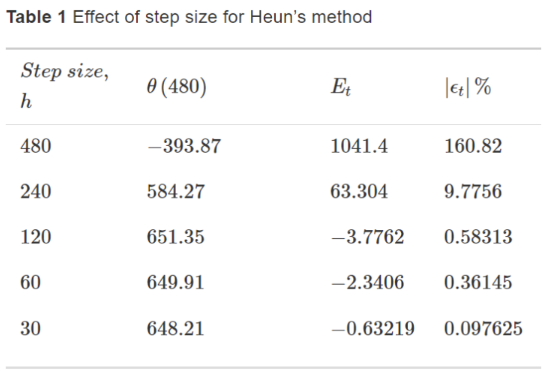

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

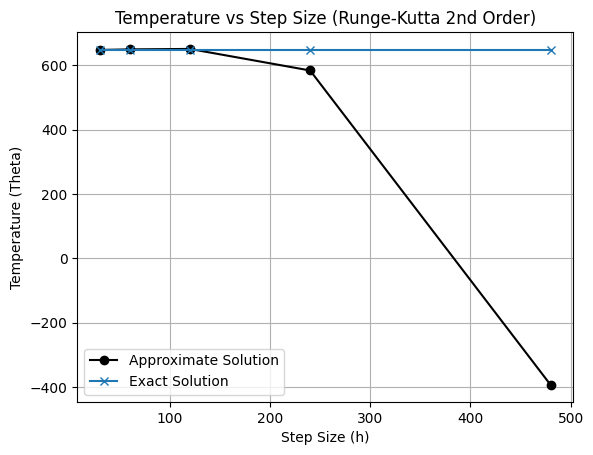

In [ ]:
# Write your code here.

import matplotlib.pyplot as plt

step_sizes = [480, 240, 120, 60, 30]

approximate_solutions = []
exact_solutions = []

exact_solution_val = exact_solution(target)

for h in step_sizes:
    approximate_solution = RungeKutta2(t_ini, theta_ini, h, target)

    approximate_solutions.append(approximate_solution)
    exact_solutions.append(exact_solution_val)

plt.plot(step_sizes, approximate_solutions, label='Approximate Solution', marker='o', color='black')
plt.plot(step_sizes, exact_solutions, label='Exact Solution', marker='x')

plt.xlabel('Step Size (h)')
plt.ylabel('Temperature (Theta)')
plt.title('Temperature vs Step Size (Runge-Kutta 2nd Order)')
plt.legend()
plt.grid(True)
plt.show()

Your graph should look something like,
<br>
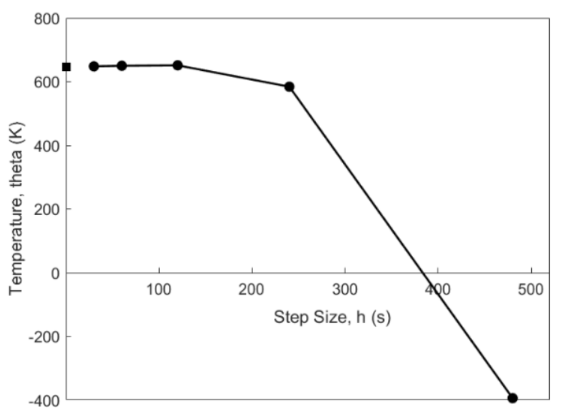

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

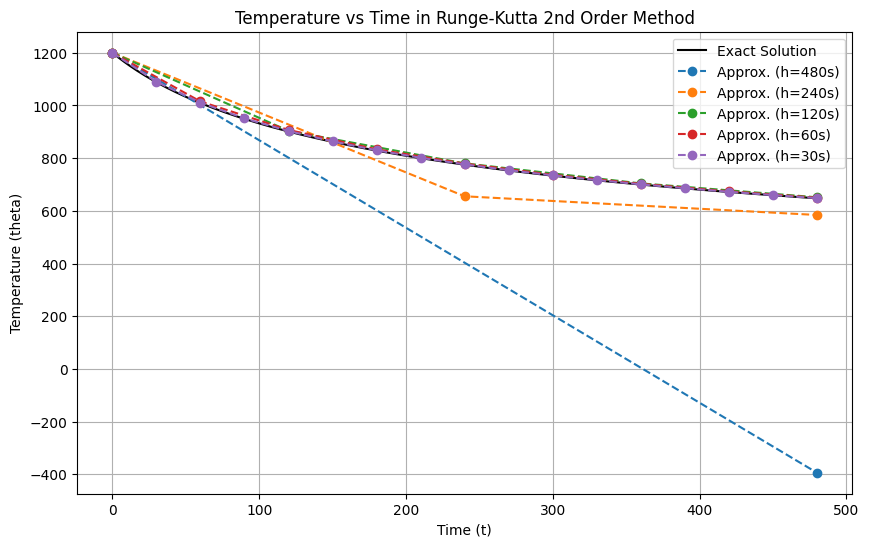

In [ ]:
# Write your code here.

def RungeKutta2_for_plot(x_0, y_0, h, x):
    num_steps = int((x - x_0) / h)

    t = x_0
    res = y_0

    t_array = [x_0]
    res_array = [y_0]

    for _ in range(num_steps):
        k1 = f(t, res)
        k2 = f(t + h, res + k1 * h)
        res += 0.5 * (k1 + k2) * h
        t += h

        t_array.append(t)
        res_array.append(res)

    return t_array, res_array

plt.figure(figsize=(10, 6))

t_array, res_array = RungeKutta2_for_plot(0, 1200, 1, target)
plt.plot(t_array, res_array, label='Exact Solution', color='black')

for h in step_sizes:
    t_array, res_array = RungeKutta2_for_plot(0, 1200, h, target)
    plt.plot(t_array, res_array, label=f'Approx. (h={h}s)', linestyle='dashed', marker='o')

plt.xlabel('Time (t)')
plt.ylabel('Temperature (theta)')
plt.title('Temperature vs Time in Runge-Kutta 2nd Order Method')
plt.grid(True)
plt.legend()
plt.show()


Your graph should look something like,
<br>
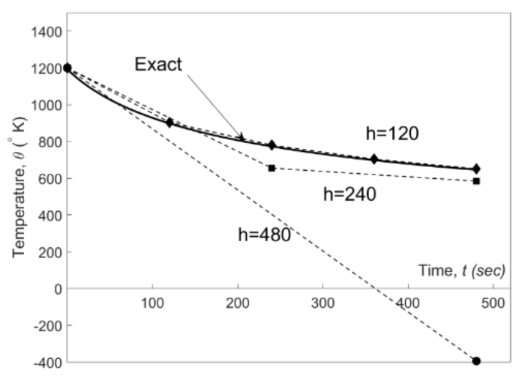